# Open-Earth-Monitor Hackathon 2023

Challenge hosted by the [Open-Earth-Monitor (OEMC) project](https://earthmonitor.org/) aiming to promote the development of monitoring solutions for the environment at European and global scale, targeting **young researchers**, **students** and **members of the GIS community**. OEMC wants to connect the challenge participants with cutting edge developments and experts in the field of modeling, machine learning and remote sensing, allowing them to improve, share knowledge and build a creditable background within Earth Observation applications.

The winners will be awarded with the opportunity to assist and present their results at the [OEMC Global Workshop](https://earthmonitor.org/gw2023/) taking place in **Bolzano, Italy from 4-6 of October**. This international event brings together European and global policy-makers, business managers, researchers and civil society to discuss solutions for environmental monitoring based on open-source, Earth Observation data and existing geospatial applications.

The links to access the challenges and datasets:
- **EU Land Cover Classification**: [Zenodo dataset](https://zenodo.org/record/8306554) and [Kaggle challenge](https://www.kaggle.com/competitions/oemc-hackathon-eu-land-cover-classification)
- **Global FAPAR Modeling**: [Zenodo dataset](https://zenodo.org/record/8306613) and [Kaggle challenge](https://www.kaggle.com/competitions/oemc-hackathon-global-fapar-modeling)

## EU Land Cover Classification

First, let's download the dataset from Zenodo using [Requests](https://pypi.org/project/requests/):

In [19]:
import requests

train_url = 'https://zenodo.org/record/8306554/files/train.csv.gz?download=1'
test_url = 'https://zenodo.org/record/8306554/files/test.csv.gz?download=1'

r_train = requests.get(train_url, allow_redirects=True)
f_train = 'land_cover_train.csv.gz'

r_test = requests.get(test_url, allow_redirects=True)
f_test = 'land_cover_test.csv.gz'

print(f"Downloading {f_train}")
open(f_train, 'wb').write(r_train.content)

print(f"Downloading {f_test}")
open(f_test, 'wb').write(r_test.content)

36033342

Now, let's load the train set using [Pandas](https://pandas.pydata.org/).

In [22]:
import pandas as pd
df_train = pd.read_csv(f_train, index_col='sample_id')
df_train

land_cover                        land_cover_label  year  \
sample_id                                                             
0                  16      Grassland without tree/shrub cover  2006   
1                  10                     Coniferous woodland  2006   
2                  15  Grassland with sparse tree/shrub cover  2018   
3                  16      Grassland without tree/shrub cover  2006   
4                  58        Shrubland with sparse tree cover  2012   
...               ...                                     ...   ...   
42232              16      Grassland without tree/shrub cover  2009   
42233              71                               Vineyards  2006   
42234              16      Grassland without tree/shrub cover  2006   
42235               4                    Broadleaved woodland  2015   
42236              59            Shrubland without tree cover  2015   

           evi_mod13q1.stl.trend_p90_250m_jan01_feb28  \
sample_id                                               
0                                              3630.0   
1                                              2851.0   
2                                              3973.0   
3                                              4401.0   
4                                              4330.0   
...                                               ...   
42232                                          3267.0   
42233                                          3868.0   
42234                                          5642.0   
42235                                          3642.0   
42236                                          1675.0   

           lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31  \
sample_id                                                    
0                                                  13868.0   
1                                                  13810.0   
2                                                  13958.0   
3                                                  13793.0   
4                                                  13868.0   
...                                                    ...   
42232                                              13753.0   
42233                                              14038.0   
42234                                              13832.0   
42235                                              14252.0   
42236                                              14199.0   

           lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28  \
sample_id                                                    
0                                                  13877.0   
1                                                  13815.0   
2                                                  13961.0   
3                                                  13796.0   
4                                                  13868.0   
...                                                    ...   
42232                                              13749.0   
42233                                              14039.0   
42234                                              13839.0   
42235                                              14255.0   
42236                                              14200.0   

           lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31  \
sample_id                                                    
0                                                  13887.0   
1                                                  13820.0   
2                                                  13963.0   
3                                                  13800.0   
4                                                  13867.0   
...                                                    ...   
42232                                              13744.0   
42233                                              14041.0   
42234                                              13848.0   
42235                                            

How many land cover classes are there in the train set?

Text(0.5, 0, 'Number of samples')

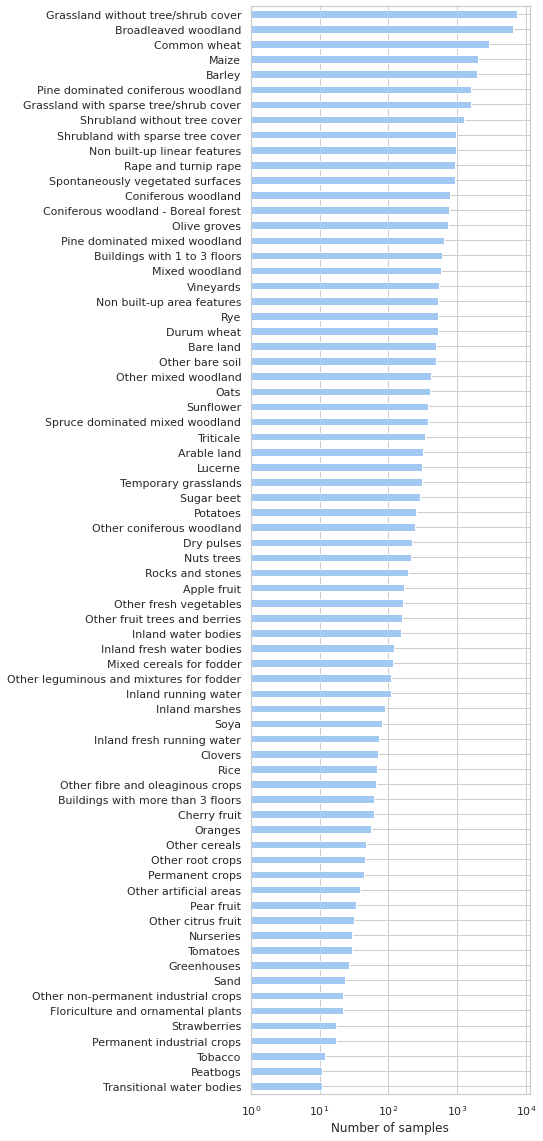

In [23]:
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
sns.set_context("notebook")

ax = pd.DataFrame(df_train['land_cover_label'].value_counts()).sort_values('land_cover_label').plot(kind='barh', figsize=(5, 20), log=True, legend=False)
ax.set_xlabel("Number of samples")

And how many features?

In [24]:
feat_cols = df_train.columns[3:]
print(f'Number of features: {len(feat_cols)}')

Number of features: 416


Okay. Let's prepare the data for modeling:

In [25]:
X_train = df_train[feat_cols].to_numpy()
y_train = df_train['land_cover'].to_numpy()

Go for it [Random Forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)!

In [26]:
from sklearn.ensemble import RandomForestClassifier

print("Training vanilla RF")
rf = RandomForestClassifier(random_state=1989, n_jobs=-1)
rf.fit(X_train, y_train)

Training vanilla RF


RandomForestClassifier(n_jobs=-1, random_state=1989)

It's time to load the test set:

In [27]:
df_test = pd.read_csv(f_test, index_col='sample_id')
df_test

year  evi_mod13q1.stl.trend_p90_250m_jan01_feb28  \
sample_id                                                     
0          2018                                      2759.0   
1          2012                                      4085.0   
2          2018                                      4169.0   
3          2012                                      2783.0   
4          2009                                      3915.0   
...         ...                                         ...   
42266      2012                                      4960.0   
42267      2015                                      3974.0   
42268      2009                                      3753.0   
42269      2018                                      5632.0   
42270      2018                                      5696.0   

           lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31  \
sample_id                                                    
0                                                  14005.0   
1                                                  14007.0   
2                                                  14024.0   
3                                                  14008.0   
4                                                  13825.0   
...                                                    ...   
42266                                              13955.0   
42267                                              13892.0   
42268                                              13971.0   
42269                                              14109.0   
42270                                              13914.0   

           lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28  \
sample_id                                                    
0                                                  14001.0   
1                                                  14006.0   
2                                                  14026.0   
3                                                  14006.0   
4                                                  13826.0   
...                                                    ...   
42266                                              13952.0   
42267                                              13893.0   
42268                                              13971.0   
42269                                              14110.0   
42270                                              13916.0   

           lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31  \
sample_id                                                    
0                                                  13998.0   
1                                                  14004.0   
2                                                  14028.0   
3                                                  14004.0   
4                                                  13826.0   
...                                                    ...   
42266                                              13948.0   
42267                                              13895.0   
42268                                              13972.0   
42269                                              14111.0   
42270                                              13917.0   

           lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30  \
sample_id                                                    
0                                                  13997.0   
1                                                  14002.0   
2                                                  14030.0   
3                                                  14003.0   
4                                                  13827.0   
...                                                    ...   
42266                                              13944.0   
42267                                              13897.0   
42268                                              13973.0   
42269                                              14113.0   
42270                     

... and predicted it:

In [28]:
X_test = df_test[feat_cols].to_numpy()
y_pred = rf.predict(X_test)

Don't forget to save the output according to [submission_sample.csv](https://www.kaggle.com/competitions/oemc-hackathon-eu-land-cover-classification/data) and submit to [Kaggle](https://www.kaggle.com/competitions/oemc-hackathon-eu-land-cover-classification/leaderboard).

In [29]:
df_subm = pd.DataFrame({'land_cover': y_pred}, index=pd.Index(df_test.index, name='sample_id'))
f_subm = 'beat_this_vanilla_rf_land_cover.csv'

df_subm.to_csv(f_subm)
print(f"Submission file {f_subm} ready (shape={df_subm.shape})")
df_subm

Submission file beat_this_vanilla_rf_land_cover.csv ready (shape=(42271, 1))


land_cover
sample_id            
0                   3
1                   9
2                  16
3                  35
4                  26
...               ...
42266              16
42267              16
42268              58
42269              16
42270              16

[42271 rows x 1 columns]

## Global FAPAR Modeling

First, let's download the dataset from Zenodo using [Requests](https://pypi.org/project/requests/):

In [30]:
import requests

train_url = 'https://zenodo.org/record/8306613/files/train.csv?download=1'
test_url = 'https://zenodo.org/record/8306613/files/test.csv?download=1'

r_train = requests.get(train_url, allow_redirects=True)
f_train = 'fapar_train.csv'

r_test = requests.get(test_url, allow_redirects=True)
f_test = 'fapar_test.csv'

print(f"Downloading {f_train}")
open(f_train, 'wb').write(r_train.content)

print(f"Downloading {f_test}")
open(f_test, 'wb').write(r_test.content)

1095922

Now, let's load the train set using [Pandas](https://pandas.pydata.org/).

In [31]:
import pandas as pd
df_train = pd.read_csv(f_train, index_col='sample_id')
df_train

station  month     fapar  modis_blue  modis_red  modis_nir  \
sample_id                                                               
0               52      2  0.310634       235.0      545.0     1306.0   
1               14      9  0.699500       355.0      531.0     3348.0   
2               52      3  0.353572       276.0      642.0     1496.0   
3               73     11  0.260067       519.0     1196.0     3256.0   
4               14      3  0.779333       327.0      528.0     3106.0   
...            ...    ...       ...         ...        ...        ...   
3456             7     10  0.027000       811.0     1169.0     1800.0   
3457            26      8  0.036196       563.0     1366.0     2776.0   
3458            56      8  0.969277       167.0      250.0     3366.0   
3459            23      3  0.536160       257.0      542.0     2104.0   
3460            73      1  0.205879       801.0     1528.0     2659.0   

           modis_mir  modis_evi  modis_ndvi  modis_lst_day_p05  ...  \
sample_id                                                       ...   
0             1414.0     1484.0      4108.0            13656.0  ...   
1              786.0     5060.0      7156.0            14904.0  ...   
2             1364.0     1614.0      4086.0            14400.0  ...   
3             1247.0     3112.0      4628.0            13264.0  ...   
4              988.0     4572.0      7048.0            15136.0  ...   
...              ...        ...         ...                ...  ...   
3456          2672.0     1163.0      2045.0            14456.0  ...   
3457          2432.0     1999.0      3316.0            15472.0  ...   
3458           525.0     5704.0      8624.0            14680.0  ...   
3459           887.0     2918.0      6168.0            14504.0  ...   
3460          1740.0     1781.0      2701.0            12656.0  ...   

           dtm_slope  dtm_aspect-cosine  dtm_aspect-sine  \
sample_id                                                  
0               10.0            -4753.0           -876.0   
1               11.0            -3071.0            945.0   
2               10.0            -4753.0           -876.0   
3                1.0             5685.0            788.0   
4               11.0            -3071.0            945.0   
...              ...                ...              ...   
3456             1.0            -9449.0            -38.0   
3457             1.0             4335.0            900.0   
3458             1.0            -3085.0            416.0   
3459             1.0             9548.0           -270.0   
3460             1.0             5685.0            788.0   

           dtm_downlslope.curvature  dtm_upslope.curvature  dtm_elevation  \
sample_id                                                                   
0                             -13.0                   13.0          351.0   
1                             -22.0                   40.0          125.0   
2                             -13.0                   13.0          351.0   
3                               0.0                    0.0          584.0   
4                             -22.0                   40.0          125.0   
...                             ...                    ...            ...   
3456                           -1.0                    3.0         1652.0   
3457                           -6.0                   -1.0         1322.0   
3458                           -4.0                    0.0           12.0   
3459                           -8.0                    3.0           42.0   
3460                            0.0                    0.0          584.0   

           dtm_cti  dtm_neg.openess  dtm_pos.openess  dtm_vbf  
sample_id                                                      
0          -2414.0            153.0            155.0     14.0  
1           -412.0            152.0            155.0     10.0  
2          -2414.0            153.0            155.0     14.0  
3           3795.0            157.

How many data points are there per station in the training set?

Text(0.5, 0, 'Number of data points')

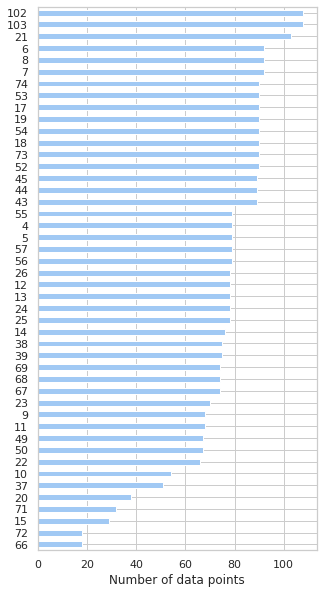

In [33]:
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
sns.set_context("notebook")

ax = pd.DataFrame(df_train['station'].value_counts()).sort_values('station').plot(kind='barh', figsize=(5, 10), legend=False)
ax.set_xlabel("Number of data points")

And how many features?

In [34]:
feat_cols = df_train.columns[3:]
print(f'Number of features: {len(feat_cols)}')

Number of features: 32


Okay. Let's prepare the data for modeling:

In [35]:
X_train = df_train[feat_cols].to_numpy()
y_train = df_train['fapar'].to_numpy()

Go for it [Random Forest regressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)!

In [36]:
from sklearn.ensemble import RandomForestRegressor

print("Training vanilla RF")
rf = RandomForestRegressor(random_state=1989, n_jobs=-1)
rf.fit(X_train, y_train)

Training vanilla RF


RandomForestRegressor(n_jobs=-1, random_state=1989)

It's time to load the test set:

In [37]:
df_test = pd.read_csv(f_test, index_col='sample_id')
df_test

station  month  modis_blue  modis_red  modis_nir  modis_mir  \
sample_id                                                                
0               36     12       692.0     1835.0     2632.0     2512.0   
1               93      1       311.0      475.0     1405.0      480.0   
2               77      3       286.0     1155.0     2272.0      702.0   
3               51      7       959.0     1884.0     2748.0     3016.0   
4               31     10       384.0      622.0     4216.0      879.0   
...            ...    ...         ...        ...        ...        ...   
4934            95      9       169.0      262.0     2556.0      435.0   
4935            29     11       469.0     1145.0     2062.0     1793.0   
4936            90      9       179.0      346.0     2136.0      796.0   
4937            85      2       216.0      406.0     2556.0      707.0   
4938            27      2       618.0     1188.0     1987.0     1962.0   

           modis_evi  modis_ndvi  modis_lst_day_p05  modis_lst_day_p50  ...  \
sample_id                                                               ...   
0             1108.0      1786.0            13600.0            13992.0  ...   
1             2051.0      4996.0            12600.0            12768.0  ...   
2             1637.0      3260.0            14904.0            14904.0  ...   
3             1283.0      1934.0            15968.0            16144.0  ...   
4             5860.0      7332.0            15128.0            15248.0  ...   
...              ...         ...                ...                ...  ...   
4934          4560.0      8056.0            14256.0            14488.0  ...   
4935          1522.0      2882.0            14272.0            14400.0  ...   
4936          3468.0      7212.0            14104.0            14528.0  ...   
4937          4004.0      7256.0            14784.0            14864.0  ...   
4938          1382.0      2540.0            13808.0            14160.0  ...   

           dtm_slope  dtm_aspect-cosine  dtm_aspect-sine  \
sample_id                                                  
0                2.0             -979.0           -994.0   
1                1.0            -2801.0           -847.0   
2               12.0             4961.0            675.0   
3                2.0             6952.0           -718.0   
4                1.0            -3561.0            920.0   
...              ...                ...              ...   
4934             3.0              981.0            989.0   
4935             2.0             9208.0            311.0   
4936             3.0             8620.0           -478.0   
4937             2.0             9674.0           -147.0   
4938             2.0             6736.0           -501.0   

           dtm_downlslope.curvature  dtm_upslope.curvature  dtm_elevation  \
sample_id                                                                   
0                               5.0                    1.0         1802.0   
1                               1.0                    2.0          218.0   
2                               4.0                   51.0          735.0   
3                              -3.0                   -1.0          992.0   
4                              -1.0                   -1.0           20.0   
...                             ...                    ...            ...   
4934                           -3.0                   -4.0           21.0   
4935                           -5.0                   -3.0          325.0   
4936                           -4.0                   -3.0          265.0   
4937                           -2.0                    6.0            9.0   
4938                           -6.0                   -5.0          323.0   

           dtm_cti  dtm_neg.openess  dtm_pos.openess  dtm_vbf  
sample_id                                                      
0           -765.0            156.0            156.0     25.0  
1           2483.0            157.0          

... and predicted it:

In [38]:
X_test = df_test[feat_cols].to_numpy()
y_pred = rf.predict(X_test)

Don't forget to save it according to [submission_sample.csv](https://www.kaggle.com/competitions/oemc-hackathon-eu-land-cover-classification/data) and submit to [Kaggle](https://www.kaggle.com/competitions/oemc-hackathon-eu-land-cover-classification/leaderboard).

In [42]:
df_subm = pd.DataFrame({'fapar': y_pred}, index=pd.Index(df_test.index, name='sample_id'))
f_subm = 'beat_this_vanilla_rf_fapar.csv'

df_subm.to_csv(f_subm)
print(f"Submission file {f_subm} ready (shape={df_subm.shape})")
df_subm

Submission file beat_this_vanilla_rf_fapar.csv ready (shape=(4939, 1))


fapar
sample_id          
0          0.032646
1          0.740488
2          0.332510
3          0.016038
4          0.785375
...             ...
4934       0.813804
4935       0.440481
4936       0.631771
4937       0.729161
4938       0.110522

[4939 rows x 1 columns]

# Good Luck!

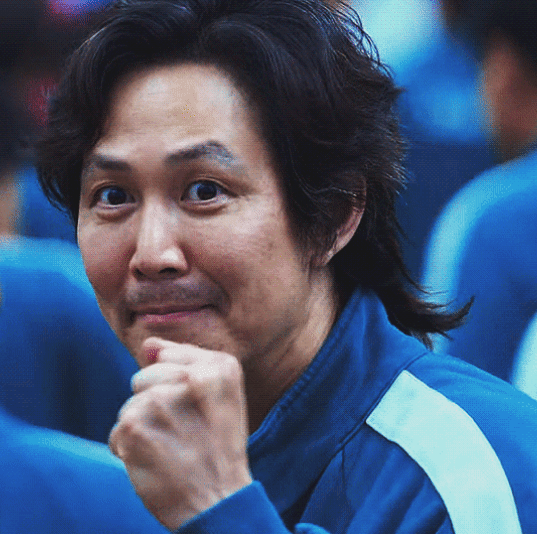